In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
import os
import ast
from helpers import *

In [3]:
df_std = pd.read_csv("data_cleaned_standardized.csv", index_col=0)

In [4]:
df_std.columns = df_std.columns.str.replace(' ', '')
df_std.columns = df_std.columns.str.replace('-', '')
df_std.columns = df_std.columns.str.replace('&', '')


df_std= df_std[df_std['Movie_box_office_scaled'].notna()]
df_std= df_std[df_std['Movie_runtime'].notna()]
df_std= df_std[df_std['Actor_height_scaled'].notna()]
df_std= df_std[df_std['Actor_name'].notna()]
df_std.reset_index(drop=True, inplace=True)
df_std['count']= df_std.groupby(['Actor_name']).Movie_name.transform('count')
df_std
#df_std.columns

,Movie_name,Movie_release_date,Movie_box_office_scaled,Movie_runtime,Actor_gender_male,Actor_height_scaled,Actor_name,Actor_age_at_movie_release,Cluster_Name_BWIndie,Cluster_Name_ComedyAction,...,Cluster_Name_ShortfilmWorldcinema,Cluster_Name_Thriller,Region_Asia,Region_Deadcountry,Region_EastEuropa,Region_NorthAmerica,Region_Oceania,Region_SouthAmerica,Region_WestEuropa,count
0,Ghosts of Mars,0.662661,-0.388863,-0.144006,0,-0.195663,Wanda De Jesus,0.213048,False,False,...,False,False,False,False,False,True,False,False,False,5
1,Ghosts of Mars,0.662661,-0.388863,-0.144006,0,1.829383,Natasha Henstridge,-0.825484,False,False,...,False,False,False,False,False,True,False,False,False,7
2,Ghosts of Mars,0.662661,-0.388863,-0.144006,1,-1.009765,Ice Cube,-0.479307,False,False,...,False,False,False,False,False,True,False,False,False,20
3,Ghosts of Mars,0.662661,-0.388863,-0.144006,1,-0.747543,Jason Statham,-0.410071,False,False,...,False,False,False,False,False,True,False,False,False,27
4,Ghosts of Mars,0.662661,-0.388863,-0.144006,0,0.184033,Clea DuVall,-1.102427,False,False,...,False,False,False,False,False,True,False,False,False,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46364,Guilty as Sin,0.364984,-0.322822,0.130824,1,-0.177494,Don Johnson,0.282284,False,False,...,False,True,False,False,False,True,False,False,False,9
46365,Guilty as Sin,0.364984,-0.322822,0.130824,0,0.361225,Rebecca De Mornay,-0.410071,False,False,...,False,True,False,False,False,True,False,False,False,15
46366,Guilty as Sin,0.364984,-0.322822,0.130824,1,-0.291504,Stephen Lang,0.074577,False,False,...,False,True,False,False,False,True,False,False,False,17
46367,Guilty as Sin,0.364984,-0.322822,0.130824,1,-1.203582,Luis Guzmán,-0.202365,False,False,...,False,True,False,False,False,True,False,False,False,32


In [5]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

mod = smf.logit(formula='Actor_gender_male ~  Movie_release_date *Movie_box_office_scaled +Movie_runtime+Actor_height_scaled \
                +Actor_age_at_movie_release+ C(Region_Asia)+ C(Region_Deadcountry)+C(Region_EastEuropa)+C(Region_NorthAmerica)+C(Region_Oceania)\
                +C(Region_SouthAmerica)+C(Region_WestEuropa)+\
                +C(Cluster_Name_CrimeThriller)+ C(Cluster_Name_Drama)+ C(Cluster_Name_BWIndie)+C(Cluster_Name_ComedyAction)+ C(Cluster_Name_ComedyShortfilm)+\
                +C(Cluster_Name_DramaBW)+C(Cluster_Name_DramaComedy)+C(Cluster_Name_DramaIndie)+ C(Cluster_Name_DramaRomance)+C(Cluster_Name_DramaThriller)+C(Cluster_Name_RomanceComedy)\
                +C(Cluster_Name_ShortfilmWorldcinema)+C(Cluster_Name_Thriller)', data=df_std)
res = mod.fit()
df_std['Propensity_score'] = res.predict()
print(res.summary())
df_std.head()

Optimization terminated successfully.
         Current function value: 0.564018
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:      Actor_gender_male   No. Observations:                46369
Model:                          Logit   Df Residuals:                    46342
Method:                           MLE   Df Model:                           26
Date:                Tue, 17 Dec 2024   Pseudo R-squ.:                  0.1234
Time:                        13:22:55   Log-Likelihood:                -26153.
converged:                       True   LL-Null:                       -29833.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                               

,Movie_name,Movie_release_date,Movie_box_office_scaled,Movie_runtime,Actor_gender_male,Actor_height_scaled,Actor_name,Actor_age_at_movie_release,Cluster_Name_BWIndie,Cluster_Name_ComedyAction,...,Cluster_Name_Thriller,Region_Asia,Region_Deadcountry,Region_EastEuropa,Region_NorthAmerica,Region_Oceania,Region_SouthAmerica,Region_WestEuropa,count,Propensity_score
0,Ghosts of Mars,0.662661,-0.388863,-0.144006,0,-0.195663,Wanda De Jesus,0.213048,False,False,...,False,False,False,False,True,False,False,False,5,0.817840
1,Ghosts of Mars,0.662661,-0.388863,-0.144006,0,1.829383,Natasha Henstridge,-0.825484,False,False,...,False,False,False,False,True,False,False,False,7,0.353864
2,Ghosts of Mars,0.662661,-0.388863,-0.144006,1,-1.009765,Ice Cube,-0.479307,False,False,...,False,False,False,False,True,False,False,False,20,0.834714
3,Ghosts of Mars,0.662661,-0.388863,-0.144006,1,-0.747543,Jason Statham,-0.410071,False,False,...,False,False,False,False,True,False,False,False,27,0.814668
4,Ghosts of Mars,0.662661,-0.388863,-0.144006,0,0.184033,Clea DuVall,-1.102427,False,False,...,False,False,False,False,True,False,False,False,13,0.591941


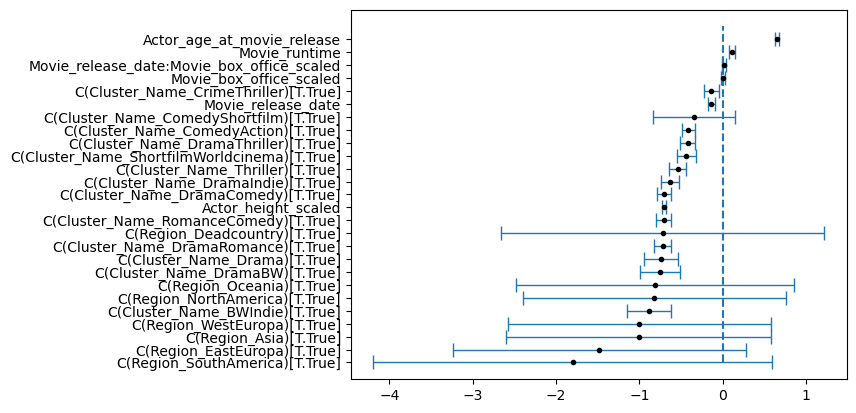

In [6]:
# feature names
variables = res.params.index

# quantifying uncertainty!

# coefficients
coefficients = res.params.values

# p-values
p_values = res.pvalues

# standard errors
standard_errors = res.bse.values

#confidence intervals
res.conf_int()
l1, l2, l3, l4 = zip(*sorted(zip(coefficients[1:], variables[1:], standard_errors[1:], p_values[1:])))
plt.errorbar(l1, np.array(range(len(l1))), xerr= 2*np.array(l3), linewidth = 1,
             linestyle = 'none',marker = 'o',markersize= 3,
             markerfacecolor = 'black',markeredgecolor = 'black', capsize= 5)

plt.vlines(0,0, len(l1), linestyle = '--')

plt.yticks(range(len(l2)),l2);

In [7]:
import networkx as nx
dftest = df_std.sample(n=250)

control = dftest[dftest.Actor_gender_male == 0]
treat =  dftest[dftest.Actor_gender_male == 1 ]
def computediff(prop1,prop2):
    return np.abs(prop1-prop2)
def compute_similarity(prop1,prop2):
    return 1-np.abs(prop1-prop2)

G = nx.Graph()
for treat_id,treat_row in treat.iterrows():
    for control_id, control_row in control.iterrows():
        diff= computediff(control_row["Propensity_score"],treat_row["Propensity_score"])
        if (diff<0.05):
            similarity =  compute_similarity(control_row["Propensity_score"],treat_row["Propensity_score"])
            G.add_weighted_edges_from([(control_id, treat_id, similarity)])
matching = nx.max_weight_matching(G)
#matched = [i[0] for i in list(matching)] + [i[1] for i in list(matching)]
print("Number of successful matching:",len(matching))
print(matching)
dftest.head(50)

Number of successful matching: 74
{(44089, 39596), (22809, 17385), (36658, 8054), (29068, 17227), (2215, 30470), (15108, 8449), (14663, 33814), (44863, 7090), (13379, 25935), (7949, 28867), (42824, 23462), (9828, 33932), (1160, 22267), (39443, 5896), (29205, 17030), (36202, 39686), (5091, 33216), (36618, 45113), (23355, 4229), (22949, 41539), (33347, 18757), (30961, 19740), (5221, 21122), (12570, 38701), (443, 37981), (17903, 13568), (21966, 8610), (12697, 31111), (25241, 18897), (15066, 14138), (16645, 9161), (9847, 37975), (43909, 15709), (29134, 7597), (35910, 12937), (14875, 41671), (36072, 44048), (199, 24861), (28386, 22799), (24058, 40599), (38077, 24748), (1100, 16378), (22642, 31972), (6143, 44598), (1929, 32564), (38459, 4189), (32485, 11259), (16192, 19904), (44740, 9754), (43873, 32376), (35977, 91), (9875, 45974), (20266, 41449), (34067, 29848), (34370, 37839), (44935, 38421), (30897, 45741), (23366, 18706), (13869, 4953), (40449, 36265), (18211, 13301), (44978, 31262), (1

,Movie_name,Movie_release_date,Movie_box_office_scaled,Movie_runtime,Actor_gender_male,Actor_height_scaled,Actor_name,Actor_age_at_movie_release,Cluster_Name_BWIndie,Cluster_Name_ComedyAction,...,Cluster_Name_Thriller,Region_Asia,Region_Deadcountry,Region_EastEuropa,Region_NorthAmerica,Region_Oceania,Region_SouthAmerica,Region_WestEuropa,count,Propensity_score
22809,The Importance of Being Earnest,0.699870,-0.374705,-0.296690,1,-0.975562,Edward Fox,1.805465,False,False,...,False,False,False,False,True,False,False,False,9,0.914693
29098,I'm Not There,0.885918,-0.408475,0.985852,1,-0.747543,David Cross,0.282284,False,False,...,False,False,False,False,True,False,False,False,21,0.802006
17903,The Simpsons Movie,0.885918,1.662244,-0.510447,0,-1.461316,Nancy Cartwright,0.697697,False,True,...,False,False,False,False,True,False,False,False,11,0.906448
44860,DuckTales the Movie: Treasure of the Lost Lamp,0.253355,-0.339293,-0.876887,1,0.392555,Christopher Lloyd,0.836168,False,False,...,False,False,False,False,True,False,False,False,37,0.738644
31262,Extreme Measures,0.476613,-0.362480,0.466728,1,-0.428315,J. K. Simmons,0.143813,False,False,...,True,False,False,False,True,False,False,False,37,0.764534
23462,Event Horizon,0.513822,-0.316374,-0.174543,1,0.073328,Sam Neill,0.697697,False,False,...,True,False,False,False,True,False,False,False,19,0.752478
23197,Road to Perdition,0.699870,0.383254,0.436191,1,0.050526,Jude Law,-0.687013,False,False,...,False,False,False,False,True,False,False,False,22,0.663628
38459,Five Came Back,-1.644333,-0.411588,-0.907424,0,0.677638,Lucille Ball,-0.825484,False,False,...,False,False,False,False,True,False,False,False,10,0.424032
40390,No Holds Barred,0.216146,-0.346645,-0.296690,1,-1.317591,David Paymer,-0.340836,False,True,...,False,False,False,False,True,False,False,False,28,0.826638
6425,Prometheus,1.071966,1.005142,0.649948,1,-0.177494,Logan Marshall-Green,-0.271600,False,False,...,False,False,False,False,True,False,False,False,3,0.775411


In [8]:
matched = [i[0] for i in list(matching)] + [i[1] for i in list(matching)]
bd = df_std.iloc[matched]

treated = bd.loc[bd['Actor_gender_male'] == 1]
control= bd.loc[bd['Actor_gender_male'] == 0]


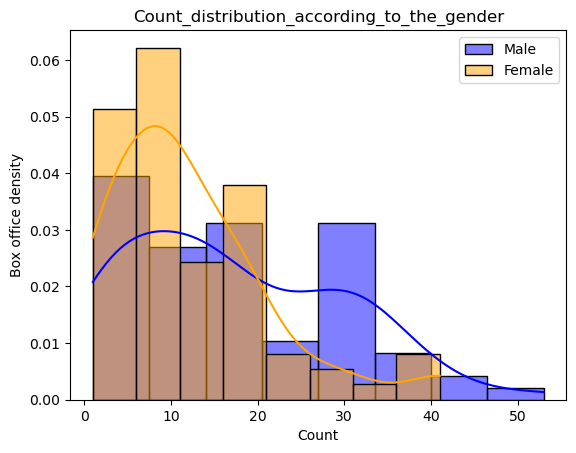

In [9]:
ax = sns.histplot(treated['count'], kde=True, stat='density', color='blue', label='Male');
ax = sns.histplot(control['count'], kde=True, stat='density', color='orange', label='Female')
ax.set(title='Count_distribution_according_to_the_gender',xlabel='Count', ylabel='Density')
plt.legend()
plt.show()


In [10]:
from scipy.stats import ttest_ind
ttest_ind(treated['count'],control['count'])

TtestResult(statistic=2.9241774404286027, pvalue=0.0040050869647325245, df=146.0)

17.2972972972973
